# In The Mood For Love

Projeto inspirado pelo filme In The Mood For Love do diretor Wong Kar-Wai.

Passos:
1. Extrair trecho do filme e separar em cenas. Duas opções: utilizar o método do ffmpeg ou a biblioteca scenedetect.
2. Extrair frames das cenas para analisar imagem (hue, saturação...).
3. Extrair áudio das cenas e coletar informações como nível médio de áudio e silêncio.

Fazer funcionar antes para depois melhorar.
Pontos a melhorar: adicionar mais atributos de audio e de imagem, extrair mais de um frame por cena, otimizar detecção de cenas...

In [49]:
import pandas as pd 
import numpy as np 

In [67]:
from importlib import reload
import sys
sys.path.append('../src')

import scene_detection
import feature_extraction 
import visualization

reload(scene_detection)
reload(feature_extraction)
reload(visualization)

from scene_detection import detect_scene, detect_scene_low_resolution
from feature_extraction import audio_features, extract_frames, image_features, movement_features
from visualization import plot_rms_silence, plot_hue_saturation, plot_movement

In [51]:
video_name = 'snippet' 
file_extension = '.mp4' 
video_file =  video_name + file_extension 

df = pd.DataFrame() 
df = detect_scene(video_file) 
# df = detect_scene_low_resolution(video_file) 

VideoManager is deprecated and will be removed.


Total de shots: 7


In [ ]:
df = audio_features(video_file, df) 
df = extract_frames(video_file, df) 
df = image_features(df) 
df = movement_features(video_file, df) 

In [ ]:
df.head()

In [55]:
df.to_csv(f'../data/{video_name}.csv', index=False)

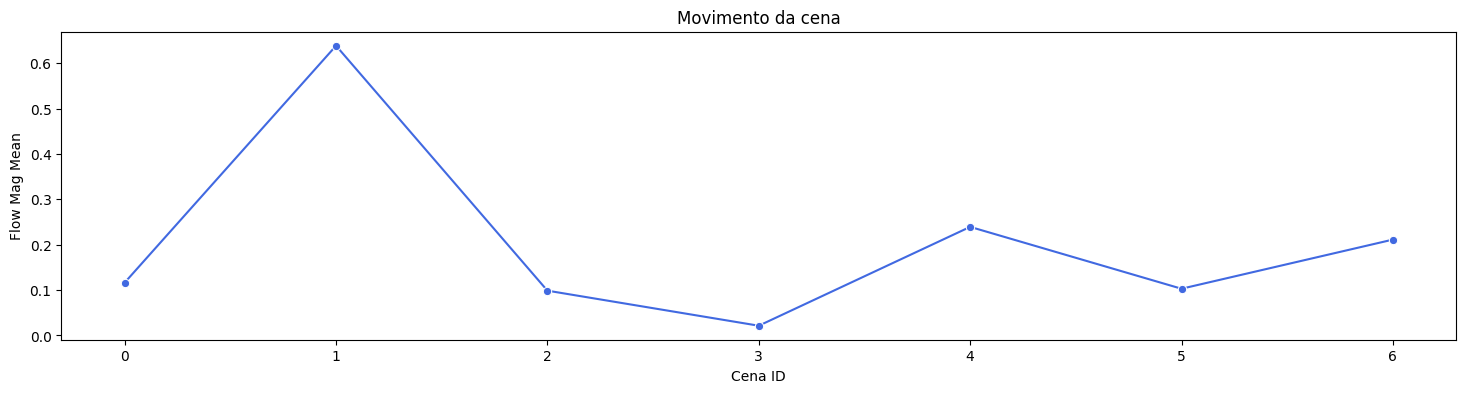

In [ ]:
# Visualization of audio, image and movement features 
# plot_rms_silence(df) 
# plot_hue_saturation(df)
# plot_movement(df)